In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [3]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=50


In [4]:
dataset=tf.keras.utils.image_dataset_from_directory("training",
                                           shuffle=True,
                                            image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                            batch_size=BATCH_SIZE
                                           )

Found 2152 files belonging to 3 classes.


In [6]:
class_names= dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset) #because batch size is 32 so we have 68 batches which is the length

68

In [6]:
#VISUALISATION
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    print(image_batch[0].numpy()) #printing only one image
    
    #image batch output == (32, 256, 256, 3)
#32 batch size, 256 image size, 3 channels i'e., r g b ...

(32, 256, 256, 3)
[0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 2 0 1 0 0 0 0]
[[[132. 126. 128.]
  [131. 125. 127.]
  [130. 124. 126.]
  ...
  [166. 157. 160.]
  [173. 164. 167.]
  [173. 164. 167.]]

 [[133. 127. 129.]
  [131. 125. 127.]
  [131. 125. 127.]
  ...
  [166. 157. 160.]
  [170. 161. 164.]
  [169. 160. 163.]]

 [[122. 116. 118.]
  [122. 116. 118.]
  [124. 118. 120.]
  ...
  [157. 148. 151.]
  [156. 147. 150.]
  [153. 144. 147.]]

 ...

 [[142. 137. 141.]
  [144. 139. 143.]
  [133. 128. 132.]
  ...
  [188. 182. 186.]
  [195. 189. 193.]
  [207. 201. 205.]]

 [[147. 145. 148.]
  [139. 137. 140.]
  [141. 139. 142.]
  ...
  [200. 194. 198.]
  [201. 195. 199.]
  [202. 196. 200.]]

 [[132. 130. 133.]
  [139. 137. 140.]
  [167. 165. 168.]
  ...
  [211. 205. 209.]
  [209. 203. 207.]
  [202. 196. 200.]]]


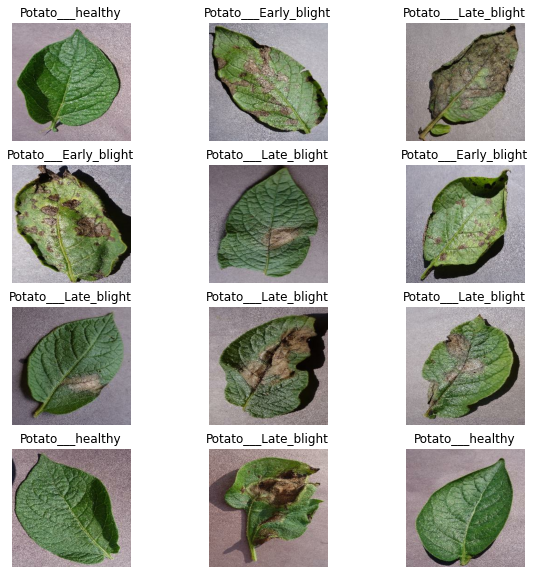

In [10]:
#VISUALISATION
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax= plt.subplot(4,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        #visualising the image

##  TESt TRAIN SPLIT

In [8]:
#we have to do all the above in a proper way 


In [9]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds= ds.shuffle(shuffle_size, seed=12)
        
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [11]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [14]:
len(train_ds)
len(test_ds)

8

## Preprocessing


In [17]:
#scaling the dataset and resizing our images
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

DATA AUGMENTATION

In [20]:
#Now one more thing we need to do in pre processing is data augmentation
#In Data augmentation we take our image and create difrent images from 1 image in terms of rotation contrast zoom etc so that our model train better
#to make our model Robust

In [25]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

##  Creating Model CNN

In [29]:
#we will apply the preprocessing in our model
n_classes=3
input_shape=(BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    
    #convulational layer
    layers.Conv2D(32, (3,3), activation="relu",
                  input_shape=input_shape),
    
    #poolling layer-- reserving features but still reducing size by storing only maximum values
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),  
    #NOTE-- Number of layers just based on hit and trial 
    
    layers.Flatten(), #flattening the data to single array
    layers.Dense(64,activation="relu"),
    layers.Dense(n_classes,activation="softmax"), #3 neurons with softmax activation function
    
    
])
model.build(input_shape=input_shape)

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [32]:
model.compile(
optimizer="adam",
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy']
)

In [36]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 132s 2s/step - loss: 0.9050 - accuracy: 0.4971 - val_loss: 0.9461 - val_accuracy: 0.7188
Epoch 2/50
54/54 [==============================] - 117s 2s/step - loss: 0.7791 - accuracy: 0.6326 - val_loss: 0.6391 - val_accuracy: 0.7440
Epoch 3/50
54/54 [==============================] - 116s 2s/step - loss: 0.5271 - accuracy: 0.7859 - val_loss: 0.3870 - val_accuracy: 0.8854
Epoch 4/50
54/54 [==============================] - 117s 2s/step - loss: 0.3909 - accuracy: 0.8351 - val_loss: 0.4105 - val_accuracy: 0.8229
Epoch 5/50
54/54 [==============================] - 119s 2s/step - loss: 0.2960 - accuracy: 0.8797 - val_loss: 0.3364 - val_accuracy: 0.8750
Epoch 6/50
54/54 [==============================] - 117s 2s/step - loss: 0.2788 - accuracy: 0.8938 - val_loss: 0.4379 - val_accuracy: 0.8281
Epoch 7/50
54/54 [==============================] - 115s 2s/step - loss: 0.1923 - accuracy: 0.9313 - val_loss: 0.2205 - val_accuracy: 0.9375
Epoch 8/50
54

In [37]:
score=model.evaluate(test_ds)

8/8 [==============================] - 6s 564ms/step - loss: 0.0128 - accuracy: 0.9922


In [38]:
score

[0.012789461761713028, 0.9921875]

In [39]:
history

In [40]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [41]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [45]:
history.history['accuracy']

[0.4970657229423523,
 0.6326290965080261,
 0.7858796119689941,
 0.8350939154624939,
 0.8796948194503784,
 0.8937793374061584,
 0.9313380122184753,
 0.9278169274330139,
 0.920187771320343,
 0.9377934336662292,
 0.9507042169570923,
 0.9237089157104492,
 0.9401408433914185,
 0.9413145780563354,
 0.9419013857841492,
 0.9624413251876831,
 0.9577465057373047,
 0.9735915660858154,
 0.966549277305603,
 0.9747652411460876,
 0.9664351940155029,
 0.9759389758110046,
 0.9618544578552246,
 0.966549277305603,
 0.9688966870307922,
 0.9785879850387573,
 0.9756944179534912,
 0.9771126508712769,
 0.9814814925193787,
 0.9788732528686523,
 0.9782863855361938,
 0.9820601940155029,
 0.9888497591018677,
 0.9930555820465088,
 0.9841549396514893,
 0.9882628917694092,
 0.9900234937667847,
 0.9930555820465088,
 0.9890046119689941,
 0.9624413251876831,
 0.9853286147117615,
 0.9806337952613831,
 0.98591548204422,
 0.98591548204422,
 0.9865023493766785,
 0.9835680723190308,
 0.9837962985038757,
 0.9888497591018677,

In [46]:
acc= history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

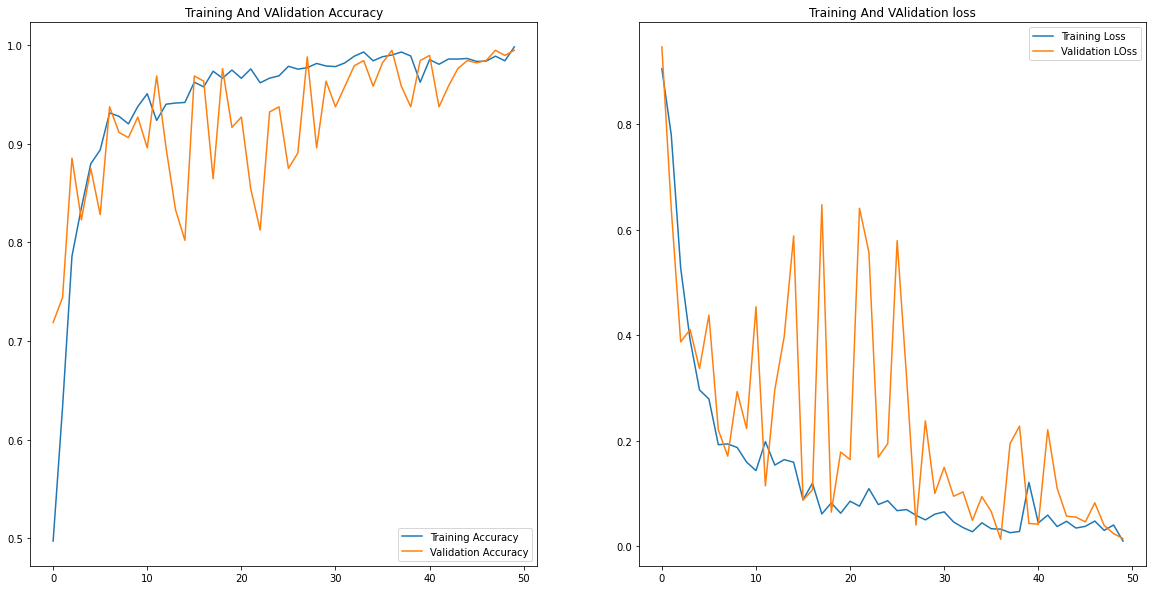

In [52]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training And VAlidation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label="Training Loss")
plt.plot(range(EPOCHS), val_loss, label="Validation LOss")
plt.legend(loc="upper right")
plt.title("Training And VAlidation loss")
plt.show()

First image to predict


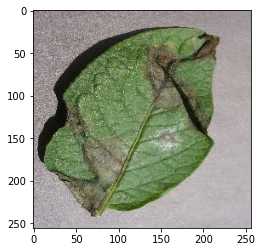

First image actual label: Potato___Late_blight
predicted label: Potato___Late_blight


In [80]:
for image_batch, label_batch in test_ds.take(1):
#     print(image_batch[0].numpy())
    first_image=plt.imshow(image_batch[0].numpy().astype("uint8"))
    first_label= label_batch[0].numpy()
    print("First image to predict")
    plt.show(first_image)
    print("First image actual label:", class_names[first_label])
    batch_prediction=model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [81]:
def predict(model, img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy()) #Converted image into an array
    img_array= tf.expand_dims(img_array,0) #created batch
    
    predictions = model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence= round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

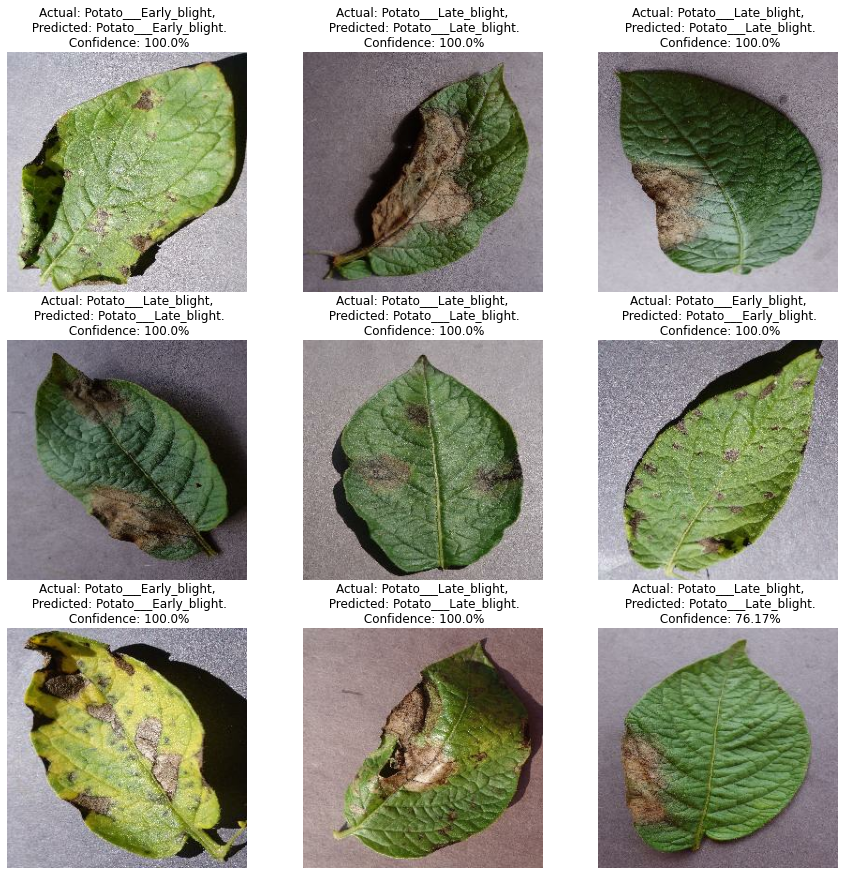

In [84]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")
        

## Saving the model

In [86]:
import os
model_version=max([int(i) for i in os.listdir("models") + [0]])+1
model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/1\assets


In [88]:
model.save("potatoes.h5")